In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from decompose_compose.pipeline import *
from utils.results_visualization import save_results

warnings.filterwarnings("ignore")

supervisely_lib was not imported
[Taichi] version 1.6.0, llvm 15.0.4, commit f1c6fbbd, linux, python 3.9.16


[I 11/25/23 17:59:24.978 43382] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
/home/user/conda/envs/mpia/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Default usage from configuration file

In [4]:
default_feature_sampler_limitations = {
    'class_type': {
        'ne': 0
    },
    'main_diag_height': {
        'ge': 20
    },
    'main_diag_width': {
        'ge': 20
    }
}

In [5]:
pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


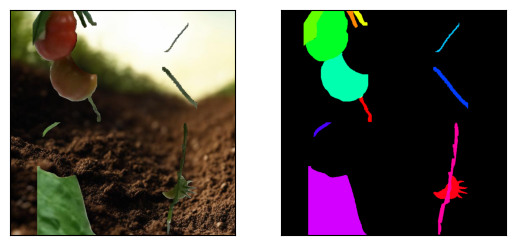

In [6]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Use all data

Without *feature_sampler_limitations* some object parts are too smal to transform, therefore they are added without spatial transformations

In [7]:
pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Skipping invalid transform with img.shape=(72, 15, 3)
h 72
w 0
Skipping invalid transform with img.shape=(72, 15, 3)
init_angle 89
target_angle 88
target_h 72
target_w 0
Skipping invalid transform with img.shape=(51, 9, 3)
h 51
w 0
Skipping invalid transform with img.shape=(51, 9, 3)
init_angle 91
target_angle 90
target_h 51
target_w 0


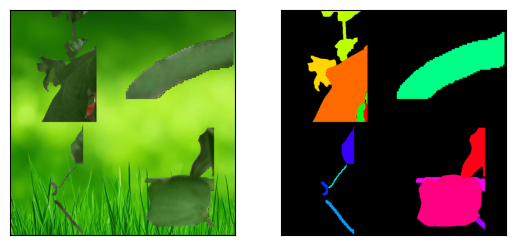

In [8]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Change config in script

In [9]:
default_config = {
        "device": "cpu",
        "composition_mode": "modification",
        "blending_mode": "base",
        "object_prefix": "plant_",
        "dataset_names": [
            "Tomato detection"
        ],
        "result_sizes": [
            [640, 640]
        ],
        "force_repreparation": False,
        "augmentations_config_path": "./configs/augmentation_config.py",
        "background_generation": {
            "storage_path": "./tmp_data/background_storage/",
            "requires_model": True,
            "samples_per_dataset": 3
        },
        "sampling": {
            "num_objects_per_image": "random_from_data",
            "object_schema_mode": "random_from_data"
        },
        "object_placement": "uniform_2d"
    }

In [10]:
pipeline = Pipeline(
    project_config=default_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


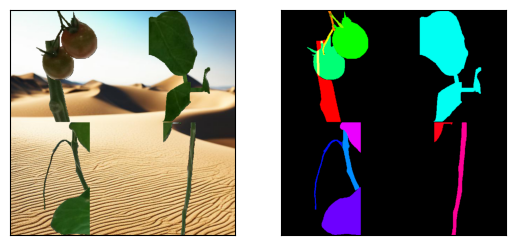

In [11]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Using multiple datasets

In [12]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants', 'Cassava Leaf Disease', 'Corn or Maize Leaf Disease', 'flower_classification', 'Herbarium', 'Plant Pathology', 'Tomato detection', 'Wild Edible Plants']

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['fruit_plants', 'Cassava Leaf Disease', 'Corn or Maize Leaf Disease', 'flower_classification', 'Herbarium', 'Plant Pathology', 'Tomato detection', 'Wild Edible Plants'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


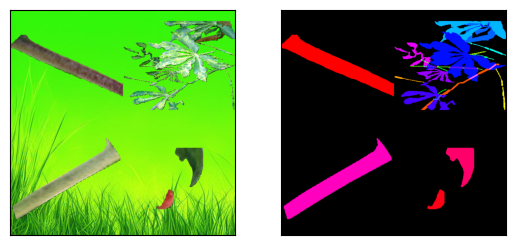

In [13]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Change verbocity

In [14]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants', 'Wild Edible Plants']

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.prepare()

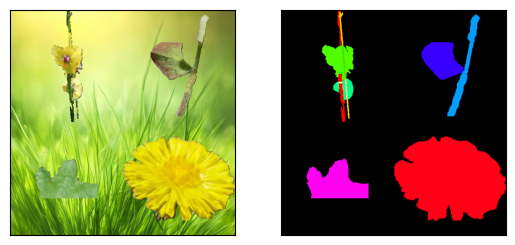

In [15]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Change number of objects

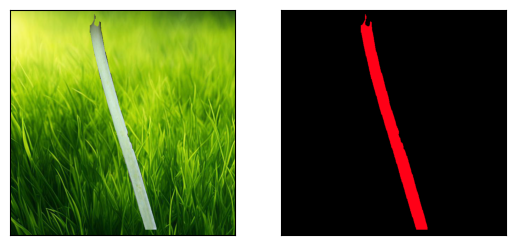

In [16]:
generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)

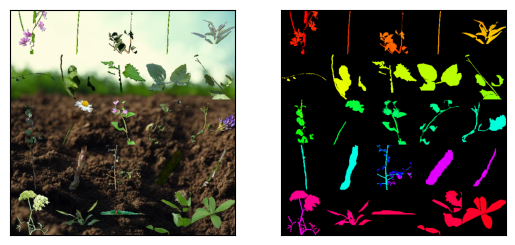

In [17]:
generated_scene, mask_part_list = pipeline.run(num_objects=25)
save_results(generated_scene, mask_part_list)

## Change *result_sizes*

In [18]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['result_sizes'] = [[1280, 640], [640, 1280]]

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[1280, 640], [640, 1280]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Upscaling image via interporation


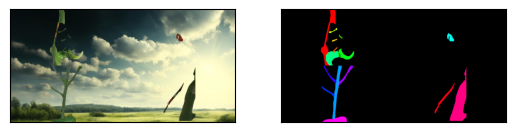

In [19]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Create new objects

In [20]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random' # random random_from_data

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'creation', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


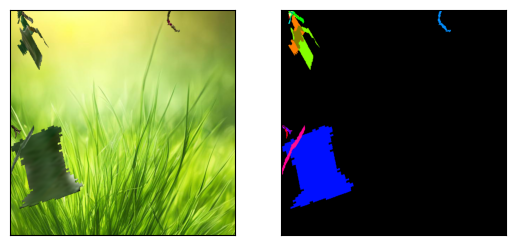

In [21]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

In [22]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random_from_data' # random random_from_data

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'creation', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Skipped part transformation
Skipped part transformation
Skipped part transformation
Skipped part transformation
Skipped part transformation
Skipped part transformation


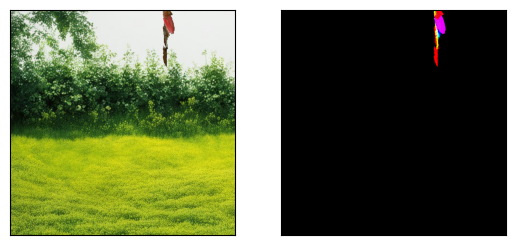

In [23]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

# Object placement

In [26]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'uniform_2d'

pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


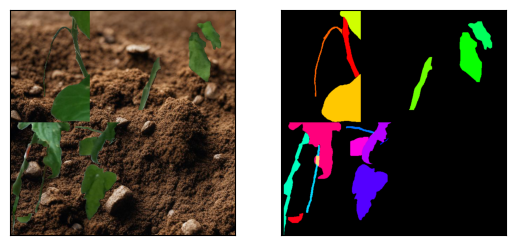

In [27]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

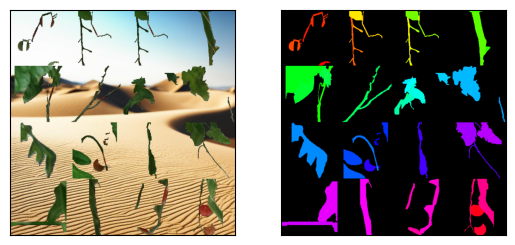

In [28]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [29]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'uniform_1d'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_1d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


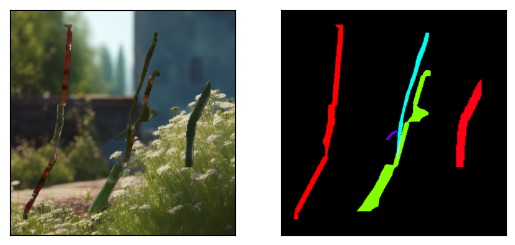

In [30]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

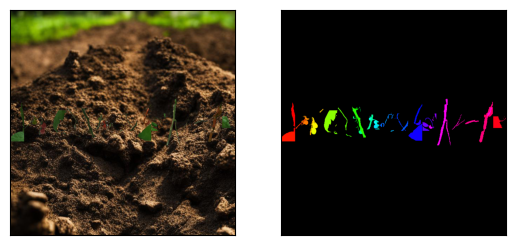

In [31]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [32]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'random'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'random', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


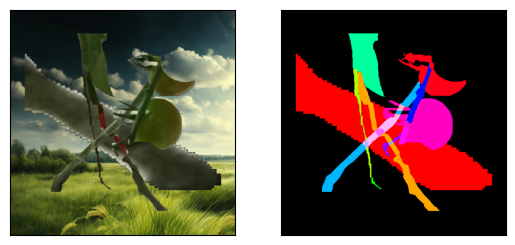

In [33]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

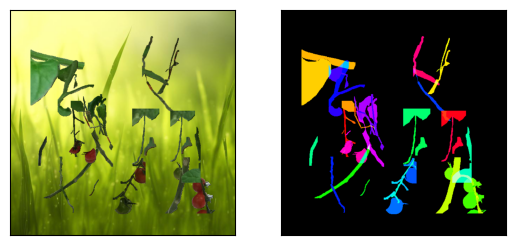

In [34]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [35]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'no_overlap'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'no_overlap', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


2 objects will overlap more than 20%


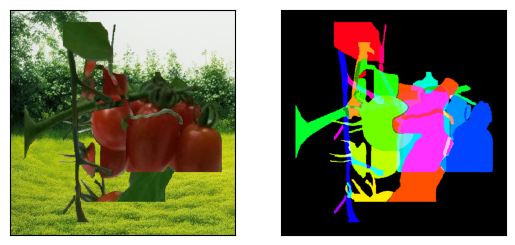

In [36]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

12 objects will overlap more than 20%


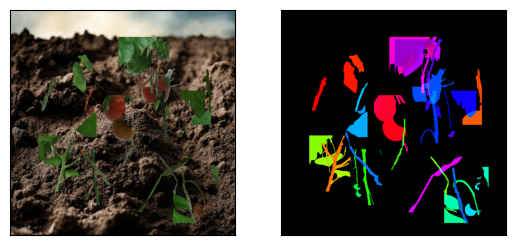

In [37]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

# Altering basic augmentations

In [38]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random_from_data' # random random_from_data
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'creation', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config_strong.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data'}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Skipped part transformation
Skipped part transformation


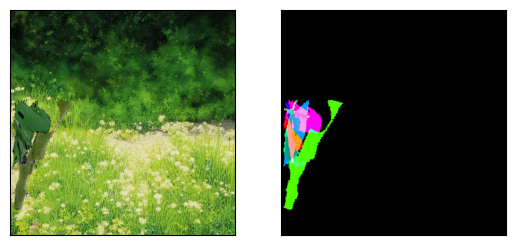

In [49]:
generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)